**IMAGE FILTERIMG**

In [4]:
import pandas as pd

# Load the dataset
file_path = "polar_annotations.xlsx"  
df = pd.read_excel(file_path, sheet_name="validation_set")


In [5]:
# Apply mapping to standardize "OPTICAL DIAGNOSIS" and "PATHOLOGY DIAGNOSIS"
original_df_count = len(df)
print("orginial df size:", original_df_count)
diagnosis_mapping = {
    "Tubular adenoma": "Adenoma",
    "Tubulovillous adenoma": "Adenoma",
    "Villous adenoma": "Adenoma",
    "Hyperplastic": "Hyperplastic polyp"
}
df["PATHOLOGY DIAGNOSIS"] = df["PATHOLOGY DIAGNOSIS"].replace(diagnosis_mapping)
df = df[df["OPTICAL DIAGNOSIS"].isin(["Adenoma", "Hyperplastic polyp"])]
original_df_count = len(df)
print("size with only wanted polyps", original_df_count)

# Filter out rows where "OPTICAL DIAGNOSIS" and "PATHOLOGY DIAGNOSIS" are different
filtered_df = df[df["OPTICAL DIAGNOSIS"] == df["PATHOLOGY DIAGNOSIS"]]

# Save the filtered data to a new Excel file
filtered_file_path = "filtered_annotations.xlsx"  
filtered_df.to_excel(filtered_file_path, index=False)

print("Filtered data saved successfully to:", filtered_file_path)
filtered_df_count = len(filtered_df)
print("filtered df size:", filtered_df_count)

orginial df size: 730
size with only wanted polyps 601
Filtered data saved successfully to: filtered_annotations.xlsx
filtered df size: 461


**FILTERED RESULTS ANALAYSIS**


🔹 First 5 Rows of the Dataset:
                         PATIENT_ID                        POLYP/IMAGE_ID  \
0  287a18ae061a4f779a02d787f01e823c  57781dbd-5c47-4e9f-985e-62a9077ea9c5   
1  287a18ae061a4f779a02d787f01e823c  ddb3f8d6-1f22-4576-8f74-d9d4751a48da   
2  287a18ae061a4f779a02d787f01e823c  64319dc0-e72d-4902-8084-ecdc17136bdd   
3  287a18ae061a4f779a02d787f01e823c  bc673cdc-2e3a-41c7-8b37-cf289a3e42d5   
4  287a18ae061a4f779a02d787f01e823c  8f155836-88df-4521-980e-5145a183879c   

  POLYP POSITION (x,y,w,h) POLYP MORPHOLOGY  POLYP SIZE    POLYP LOCATION  \
0      [75, 468, 260, 325]          Sessile           3   Ascending colon   
1      [62, 593, 436, 389]     Pedunculated           5  Transverse colon   
2     [747, 613, 190, 223]          Sessile           4   Ascending colon   
3     [641, 726, 165, 162]          Sessile           3            Rectum   
4      [435, 28, 319, 237]          Sessile           4  Transverse colon   

  OPTICAL DIAGNOSIS OPTCAL DIAGNOSIS CONFI

/var/folders/82/p1m1y13x78l6tmqz90t8smn80000gn/T/ipykernel_16969/1275835039.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["OPTICAL DIAGNOSIS"], palette="Set2")


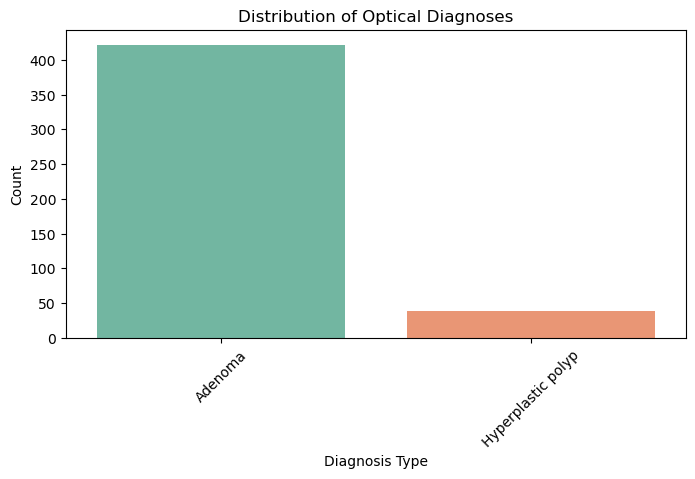

/var/folders/82/p1m1y13x78l6tmqz90t8smn80000gn/T/ipykernel_16969/1275835039.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["PATHOLOGY DIAGNOSIS"], palette="Set3")


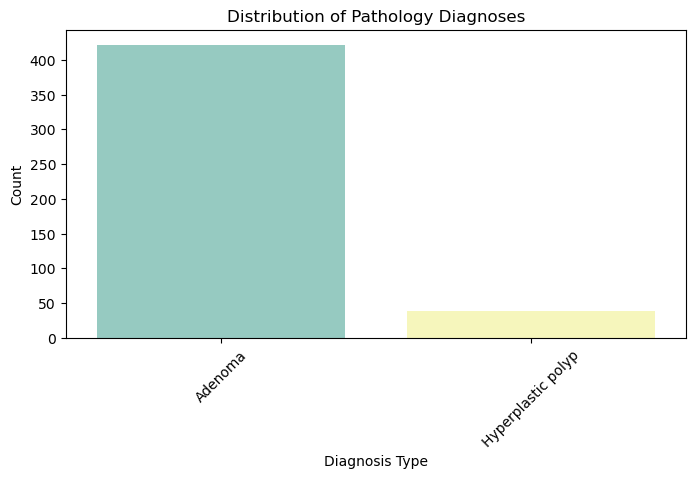

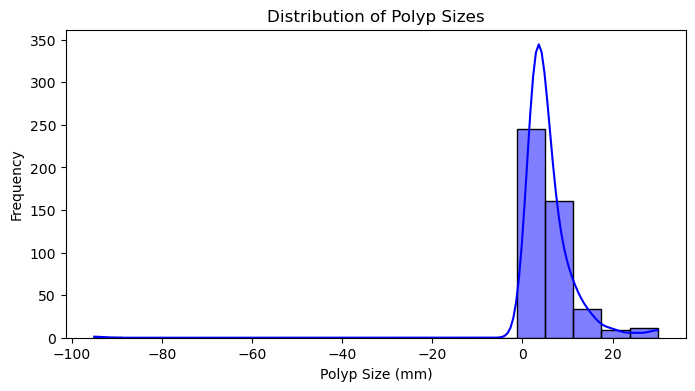

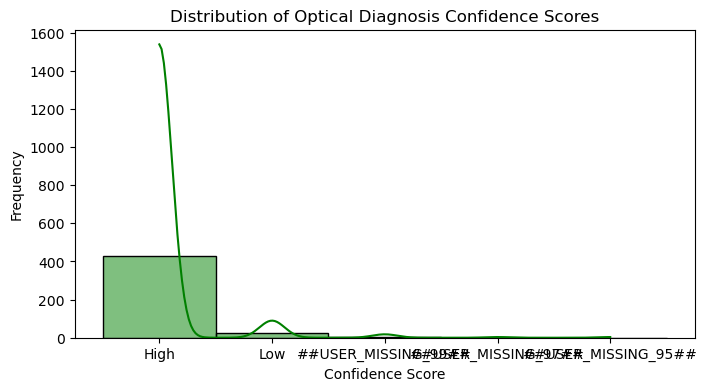

/var/folders/82/p1m1y13x78l6tmqz90t8smn80000gn/T/ipykernel_16969/1275835039.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["POLYP LOCATION"], palette="coolwarm")


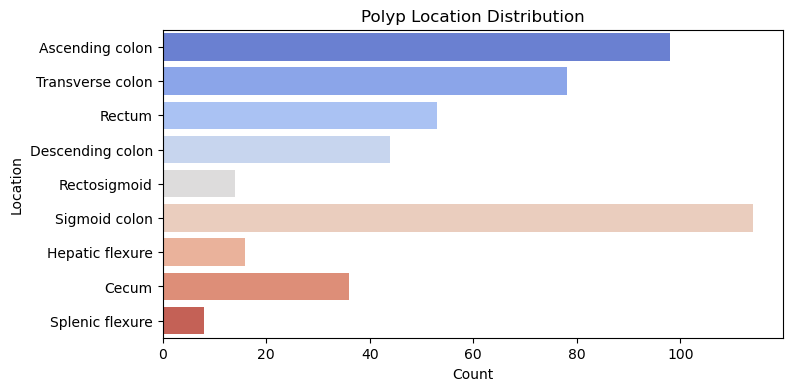


 Data Analysis Completed!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered dataset
file_path = "filtered_annotations.xlsx"  
df = pd.read_excel(file_path)

### Basic Data Exploration ###
print("\n🔹 First 5 Rows of the Dataset:")
print(df.head())

print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Missing Values Count:")
print(df.isnull().sum())

print("\n🔹 Statistical Summary:")
print(df.describe())

### Data Visualization ###

# Optical Diagnosis
plt.figure(figsize=(8, 4))
sns.countplot(x=df["OPTICAL DIAGNOSIS"], palette="Set2")
plt.title("Distribution of Optical Diagnoses")
plt.xlabel("Diagnosis Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Pathology Diagnosis
plt.figure(figsize=(8, 4))
sns.countplot(x=df["PATHOLOGY DIAGNOSIS"], palette="Set3")
plt.title("Distribution of Pathology Diagnoses")
plt.xlabel("Diagnosis Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Size Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["POLYP SIZE"], bins=20, kde=True, color="blue")
plt.title("Distribution of Polyp Sizes")
plt.xlabel("Polyp Size (mm)")
plt.ylabel("Frequency")
plt.show()

# 4️⃣ Optical Diagnosis Confidence
plt.figure(figsize=(8, 4))
sns.histplot(df["OPTCAL DIAGNOSIS CONFIDENCE"], bins=20, kde=True, color="green")
plt.title("Distribution of Optical Diagnosis Confidence Scores")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.show()

# 5️⃣ Polyp Location Count
plt.figure(figsize=(8, 4))
sns.countplot(y=df["POLYP LOCATION"], palette="coolwarm")
plt.title("Polyp Location Distribution")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

print("\n Data Analysis Completed!")


**IMAGE SIZE ANALYSIS**

In [4]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import numpy as np
import glob

dataset_path = "validation_set"
image_paths = glob.glob(dataset_path + "/**/*.png", recursive=True) 

sizes = []
for img_path in image_paths:
    img = cv2.imread(img_path)
    sizes.append(img.shape[:2])  # (height, width)

sizes = np.array(sizes)
print(sizes)
print("\n🔹 Image Size Statistics:")
print("Min size:", sizes.min(axis=0))
print("Max size:", sizes.max(axis=0))
print("Mean size:", sizes.mean(axis=0))


[[1080 1350]
 [1080 1350]
 [1080 1350]
 ...
 [1080 1350]
 [1080 1350]
 [1080 1350]]

🔹 Image Size Statistics:
Min size: [ 864 1098]
Max size: [1080 1890]
Mean size: [1044.63013699 1313.25890411]


**PIXEL VALUES ANALYSIS**

- concert to grayscale
- pixel value analysis

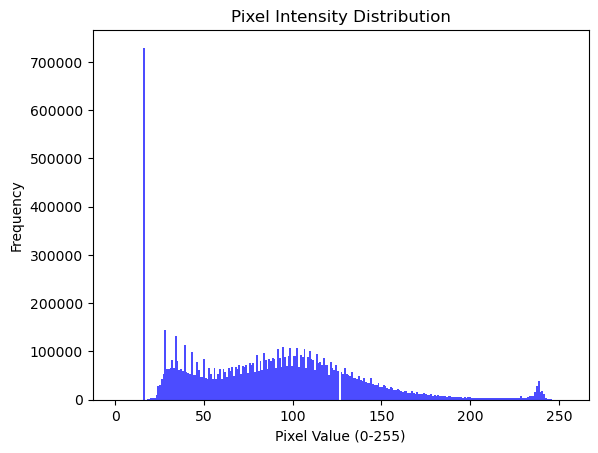

In [6]:
import matplotlib.pyplot as plt


pixel_values = []  # Store only a limited number of pixel values to avoid memory overflow
sample_size = len(image_paths) 

for img_path in image_paths[:sample_size]:  # Process a subset to prevent memory issues
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    if img is not None:
        pixel_values.extend(img.flatten()[::100])  # Sample every 100th pixel to reduce memory usage

# Plot histogram
plt.hist(pixel_values, bins=256, color="blue", alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value (0-255)")
plt.ylabel("Frequency")
plt.show()



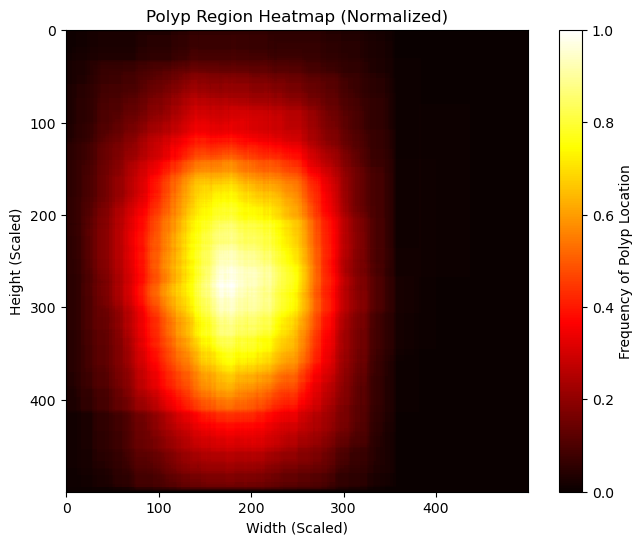

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define heatmap size
heatmap_size = (500, 500)
heatmap = np.zeros(heatmap_size)

# Define original image size range
min_size = np.array([864, 1098])  # Smallest image size
max_size = np.array([1080, 1890])  # Largest image size

for _, row in df.iterrows():
    x, y, w, h = eval(row["POLYP POSITION (x,y,w,h)"])  # Extract bounding box
    
    # Normalize coordinates to range [0, 1]
    norm_x = (x - 0) / (max_size[1] - 0)  # Normalize width (relative to max image width)
    norm_y = (y - 0) / (max_size[0] - 0)  # Normalize height (relative to max image height)
    norm_w = w / max_size[1]  # Scale width
    norm_h = h / max_size[0]  # Scale height

    # Scale to heatmap size (500x500)
    heatmap_x = int(norm_x * heatmap_size[1])
    heatmap_y = int(norm_y * heatmap_size[0])
    heatmap_w = int(norm_w * heatmap_size[1])
    heatmap_h = int(norm_h * heatmap_size[0])

    # Ensure bounding box fits inside the heatmap
    heatmap_x = max(0, min(heatmap_x, heatmap_size[1] - 1))
    heatmap_y = max(0, min(heatmap_y, heatmap_size[0] - 1))
    
    # Increment heatmap in polyp region
    heatmap[heatmap_y:heatmap_y+heatmap_h, heatmap_x:heatmap_x+heatmap_w] += 1

# Normalize heatmap for visualization
heatmap = heatmap / heatmap.max()

# Display heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, cmap="hot", interpolation="nearest")
plt.colorbar(label="Frequency of Polyp Location")
plt.title("Polyp Region Heatmap (Normalized)")
plt.xlabel("Width (Scaled)")
plt.ylabel("Height (Scaled)")
plt.show()


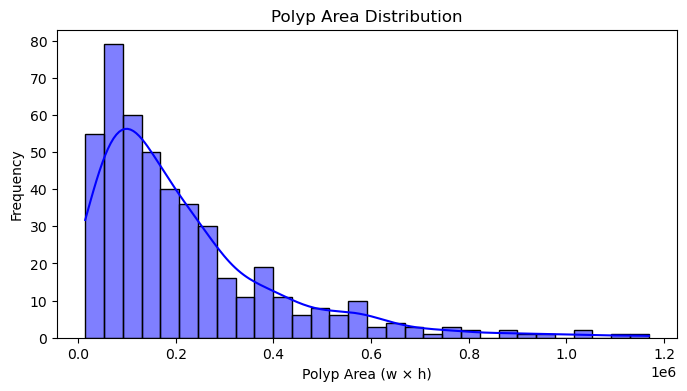

In [8]:
# Extract bounding box sizes (width & height)
df["w"] = df["POLYP POSITION (x,y,w,h)"].apply(lambda x: eval(x)[2])  # Extract width
df["h"] = df["POLYP POSITION (x,y,w,h)"].apply(lambda x: eval(x)[3])  # Extract height

# Plot polyp size distribution
plt.figure(figsize=(8,4))
sns.histplot(df["w"] * df["h"], bins=30, kde=True, color="blue")
plt.title("Polyp Area Distribution")
plt.xlabel("Polyp Area (w × h)")
plt.ylabel("Frequency")
plt.show()


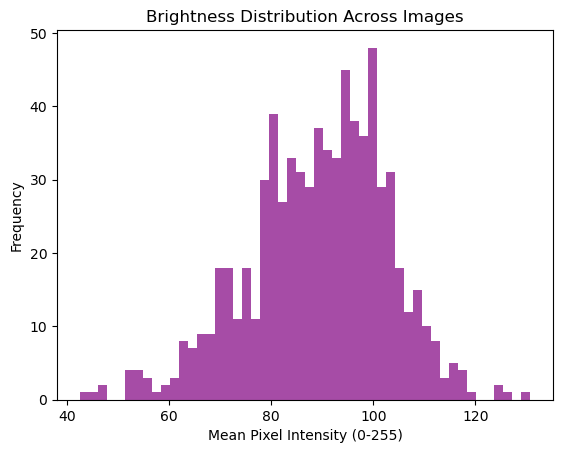

In [9]:
import cv2
import numpy as np
import glob
brightness_values = []

for img_path in image_paths:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    if img is not None:
        brightness_values.append(img.mean())  # Compute mean brightness

# Plot brightness distribution
plt.hist(brightness_values, bins=50, color="purple", alpha=0.7)
plt.title("Brightness Distribution Across Images")
plt.xlabel("Mean Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()


/var/folders/82/p1m1y13x78l6tmqz90t8smn80000gn/T/ipykernel_16969/1690862828.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


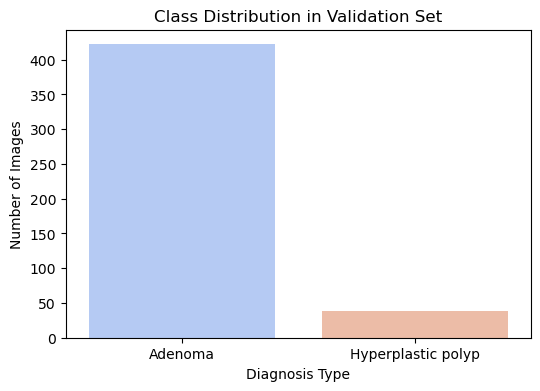

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count each class
class_counts = df["OPTICAL DIAGNOSIS"].value_counts()

# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.title("Class Distribution in Validation Set")
plt.ylabel("Number of Images")
plt.xlabel("Diagnosis Type")
plt.show()
